In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

# Dataset choice

## Dataset 1

In [2]:
face_detector = cv.dnn.readNetFromCaffe("models/deploy.prototxt.txt", "models/res10_300x300_ssd_iter_140000.caffemodel")

In [3]:
def get_faces(img, model, dimensions=(240, 240), for_display=False):
    h, w = img.shape[:2]
    blob = cv.dnn.blobFromImage(cv.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
    model.setInput(blob)
    detected = model.forward()
    extracted = []
    coordinates = []
    for i in range(detected.shape[2]):
        confidence = detected[0, 0, i, 2]
        if confidence > 0.5:
            box = detected[0, 0, i, 3:7] * np.array([w, h, w, h])
            coords = box.astype("int")
            crop_img = img[coords[1]:coords[3], coords[0]:coords[2]]
            crop_img = cv.resize(crop_img, dimensions)
            # crop_img = cv.cvtColor(crop_img, cv.COLOR_BGR2GRAY)
            extracted.append(crop_img)
            if for_display:
                coordinates.append(coords)
    if len(extracted)==0:
        return None
    if for_display:
        return extracted, coordinates
    return extracted

In [5]:
masked_files = [img for img in glob.glob("dataset/first_approach/with_mask/*.jpg")]
unmasked_files = [img for img in glob.glob("dataset/first_approach/without_mask/*.jpg")]
incorrect_files = [img for img in glob.glob("dataset/first_approach/incorrect_mask/*.jpg")]
masked = [cv.imread(img) for img in masked_files if cv.imread(img) is not None]
unmasked = [cv.imread(img) for img in unmasked_files if cv.imread(img) is not None]
incorrect = [cv.imread(img) for img in incorrect_files if cv.imread(img) is not None]

In [6]:
mfaces = [get_faces(image, face_detector) for image in masked]
mfaces = [face for image in mfaces if image is not None for face in image]

ufaces = [get_faces(image, face_detector) for image in unmasked]
ufaces = [face for image in ufaces if image is not None for face in image]

ifaces = [get_faces(image, face_detector) for image in incorrect]
ifaces = [face for image in ifaces if image is not None for face in image]

In [7]:
print(len(mfaces))
print(len(ufaces))
print(len(ifaces))

695
722
645


In [8]:
mfaces1 = [get_faces(image, face_detector) for image in masked]
mfaces1 = [i for i in mfaces1 if i is not None]
ufaces1 = [get_faces(image, face_detector) for image in unmasked]
ufaces1 = [i for i in ufaces1 if i is not None]
ifaces1= [get_faces(image, face_detector) for image in incorrect]
ifaces1 = [i for i in ifaces1 if i is not None]

### Photos statistics

In [19]:
faces1 = mfaces1 + ufaces1 + ifaces1

In [20]:
face_number = [len(faces) for faces in faces1]

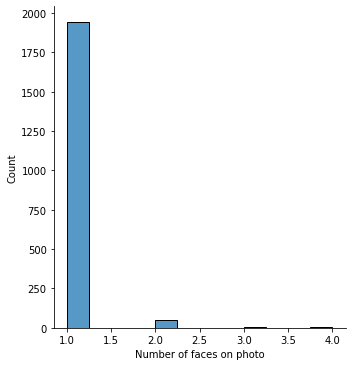

In [23]:
fig = sns.displot(face_number)
fig.set(xlabel='Number of faces on photo')
fig

### Multiple faces

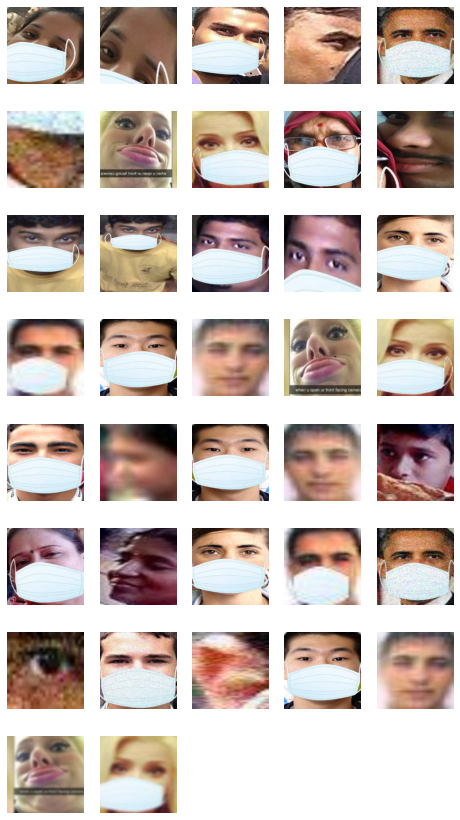

In [9]:
fig=plt.figure(figsize=(8, 15))
axes = []
j = 0
for i in range(len(mfaces1)):
    if (len(mfaces1[i]) != 1):
        for face in mfaces1[i]:
            img = cv.cvtColor(face, cv.COLOR_BGR2RGB)
            axes.append(fig.add_subplot(8, 5, j+1))
            plt.axis('off')
            plt.imshow(img)
            j += 1
        
plt.show()

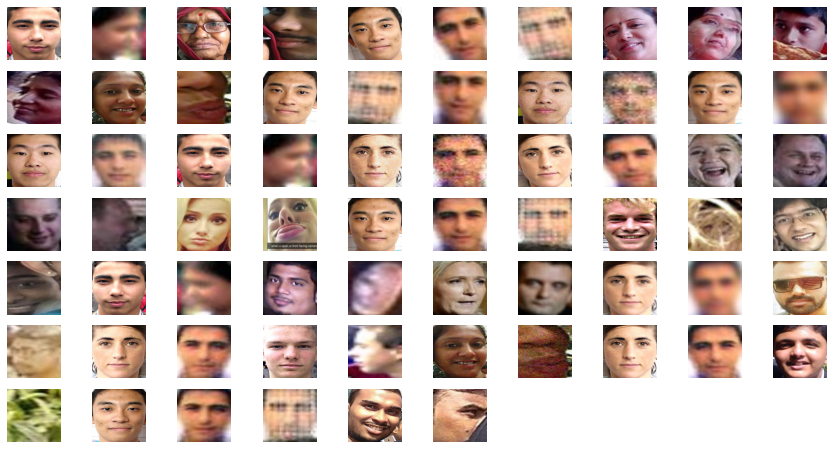

In [18]:
fig=plt.figure(figsize=(15, 8))
axes = []
j = 0
for i in range(len(ufaces1)):
    if (len(ufaces1[i]) != 1):
        for face in ufaces1[i]:
            img = cv.cvtColor(face, cv.COLOR_BGR2RGB)
            axes.append(fig.add_subplot(7,10, j+1))
            plt.axis('off')
            plt.imshow(img)
            j += 1
        
plt.show()

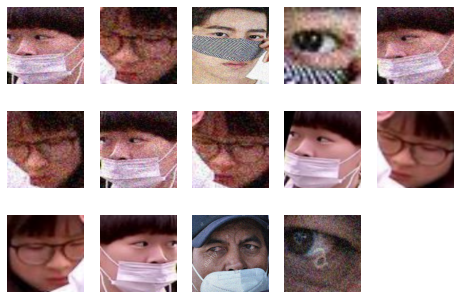

In [14]:
fig=plt.figure(figsize=(8, 15))
axes = []
j = 0
for i in range(len(ifaces1)):
    if (len(ifaces1[i]) != 1):
        for face in ifaces1[i]:
            img = cv.cvtColor(face, cv.COLOR_BGR2RGB)
            axes.append(fig.add_subplot(8, 5, j+1))
            plt.axis('off')
            plt.imshow(img)
            j += 1
        
plt.show()

## Dataset 2

### Load the data

In [ ]:
images = []
labels = []
for img_annot in annot:
    tree = ET.parse(img_annot)
    root = tree.getroot()
    file = root.find('filename').text
    file_path = img_dir + file
    img = cv.imread(file_path)
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    x = img.shape[1]/width
    y = img.shape[0]/height
    objects = root.findall('object')
    for object in objects:
        label = object.find('name').text
        labels.append(label)
        bndbox = object.find('bndbox')
        xmin = int((int(bndbox.find('xmin').text))/x)
        ymin = int((int(bndbox.find('ymin').text))/y)
        xmax = int((int(bndbox.find('xmax').text))/x)
        ymax = int((int(bndbox.find('ymax').text))/y)
        face = img[ymin:ymax, xmin:xmax]
        images.append(face)

In [ ]:
len(labels)

In [ ]:
np.unique(labels, return_counts=True)

In [ ]:
def encode(lbl):
    if lbl == 'with_mask':
        return 2
    if lbl == 'mask_weared_incorrect':
        return 1
    return 0

In [ ]:
lbls = [encode(lbl) for lbl in labels]

Characteristic points - 432 check

# Approach 1

## Load the dataset

In [ ]:
masked_files = [img for img in glob.glob("dataset/first_approach/with_mask/*.jpg")]
unmasked_files = [img for img in glob.glob("dataset/first_approach/without_mask/*.jpg")]
incorrect_files = [img for img in glob.glob("dataset/first_approach/incorrect_mask/*.jpg")]
masked = [cv.imread(img) for img in masked_files if cv.imread(img) is not None]
unmasked = [cv.imread(img) for img in unmasked_files if cv.imread(img) is not None]
incorrect = [cv.imread(img) for img in incorrect_files if cv.imread(img) is not None]

## See exemplary images

In [ ]:
fig=plt.figure(figsize=(15, 10))
axes = []
for i in range(4):
    img = cv.cvtColor(incorrect[i], cv.COLOR_BGR2RGB)
    axes.append(fig.add_subplot(1, 4, i+1))
    plt.axis('off')
    plt.imshow(img)   
plt.show()

That is not good. The images have watermarks and may be rotated.

In [ ]:
fig=plt.figure(figsize=(15, 10))
axes = []
for i in range(4):
    img = cv.cvtColor(masked[i], cv.COLOR_BGR2RGB)
    axes.append(fig.add_subplot(1, 4, i+1))
    plt.axis('off')
    plt.imshow(img)   
plt.show()

In [ ]:
fig=plt.figure(figsize=(15, 10))
axes = []
for i in range(4):
    img = cv.cvtColor(unmasked[i], cv.COLOR_BGR2RGB)
    axes.append(fig.add_subplot(1, 4, i+1))
    plt.axis('off')
    plt.imshow(img)   
plt.show()

As we can see, the used face detector didn't work very well. It will most definitely hinder model's overall performance.

I should prepare the labels for the data.

## Prepare the data

In [ ]:
mfaces_lbl = [2]* len(mfaces)
ifaces_lbl = [1]* len(ifaces)
ufaces_lbl = [0]* len(ufaces)
y = mfaces_lbl + ifaces_lbl + ufaces_lbl

In [ ]:
 x= np.concatenate((mfaces, ifaces, ufaces))

And flatten the data for the classifier.

In [ ]:
x = (np.array(x)).reshape(len(y), -1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=1, stratify=y)

## Train the classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mask_detector = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
mask_detector.score(X_test, y_test)

## Let's see the application results

In [ ]:
img1 = cv.imread("dataset/other.png")
img2 = cv.imread("dataset/other_example.png")
img3 = cv.imread("dataset/second_approach/images/maksssksksss195.png")
img4 = cv.imread("dataset/second_approach/images/maksssksksss211.png")
test_imgs = [img1, img2, img3, img4]
fig=plt.figure(figsize=(15, 10))
axes = []
for i in range(4):
    img = cv.cvtColor(test_imgs[i], cv.COLOR_BGR2RGB)
    axes.append(fig.add_subplot(1, 4, i+1))
    plt.axis('off')
    plt.imshow(img)   
plt.show()

In [ ]:
mask_result = ["No mask!", "Incorrect!", "Mask"]
mask_coloring = [(255, 0, 0), (255, 0, 0), (0, 255, 0)]

In [ ]:
mask_coloring = [(255, 0, 0), (255, 0, 0), (0, 255, 0)]

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX

In [ ]:
fig=plt.figure(figsize=(10,10))
axes = []
for i in range(4):
    img = test_imgs[i]
    if get_faces(img, face_detector) is not None:
        faces, coords = get_faces(img, face_detector, for_display=True)
        faces = [face for image in faces for face in image]
        faces_flattened = (np.array(faces)).reshape((len(coords), -1))
        res = mask_detector.predict(faces_flattened)
        img_display = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        j = 0
        for coord in coords:
            cv.rectangle(img_display, (coord[0], coord[1]), (coord[0]+coord[2], coord[1]+coord[3]), mask_coloring[res[j]], 2)
            cv.putText(img_display,mask_result[res[j]],(coord[0], coord[1]-10), fontFace = font, fontScale=1, color=mask_coloring[res[j]],thickness=1, lineType=cv.LINE_AA)
            j += 1
    else:
        img_display = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    axes.append(fig.add_subplot(2, 2, i+1))
    plt.axis('off')
    plt.imshow(img_display) 
plt.show()

# Approach 2 - old version

### Prepare for previous classifier

In [ ]:
images1 = [cv.resize(face, (240, 240)) for face in images]

In [ ]:
images1 = [image.flatten() for image in images1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images1, lbls, test_size=0.2, 
                                                    random_state=1, stratify=lbls)

In [ ]:
mask_detector = RandomForestClassifier().fit(X_train, y_train)
mask_detector.score(X_test, y_test)

It seems that the results are better even for the sole dataset itself. Let's check it out on the other dataset.

In [ ]:
test_imgs = [masked[1], unmasked[1], incorrect[0],
            masked[2], unmasked[2], incorrect[12]]

In [ ]:
fig=plt.figure(figsize=(10,10))
axes = []
for i in range(6):
    img = test_imgs[i]
    if get_faces(img, face_detector) is not None:
        faces, coords = get_faces(img, face_detector, for_display=True)
        faces_flattened = (np.array(faces)).reshape((len(coords), -1))
        faces = [face for image in faces for face in image]
        res = mask_detector.predict(faces_flattened)
        img_display = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        j = 0
        for coord in coords:
            cv.rectangle(img_display, (coord[0], coord[1]), (coord[2], coord[3]), mask_coloring[res[j]], 2)
            cv.putText(img_display, mask_result[res[j]],(coord[0], coord[1]-10), fontFace = font, fontScale=1, color=mask_coloring[res[j]],thickness=1, lineType=cv.LINE_AA)
            j += 1
    else:
        img_display = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.title("No face detected")
    axes.append(fig.add_subplot(2, 3, i+1))
    plt.axis('off')
    plt.imshow(img_display) 
plt.show()